# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings 
warnings.filterwarnings('ignore')

# Reading the Data

Dataset downloaded from https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction/data

In [2]:
pwd = os.getcwd()

df = pd.read_csv(pwd + '\\airlines_dataset.csv')

df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
# Dropping useless column 'Unnamed: 0'
df.drop(columns='Unnamed: 0', inplace=True)

In [4]:
df.shape

(300153, 11)

In [5]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


# Data Exploration

### Which airline is the most popular?

In [8]:
unique_flights = df.groupby(['flight', 'airline'], as_index=False).count()
unique_flights['airline'].value_counts()

airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64

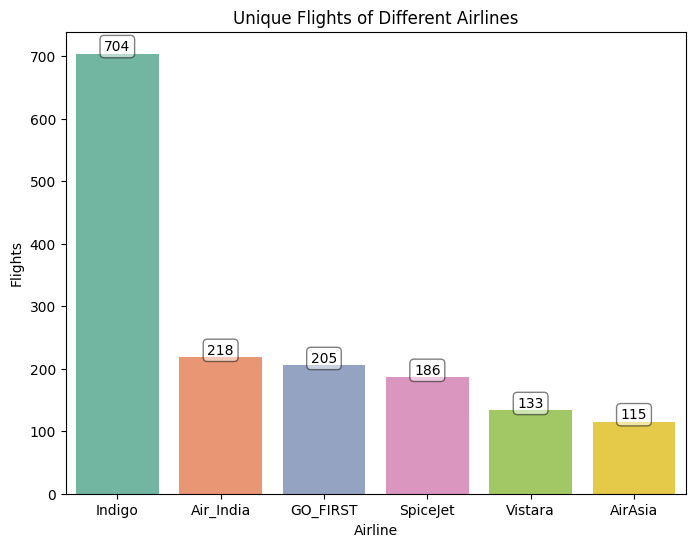

In [9]:
plt.figure(figsize=(8,6))
ax=sns.barplot(unique_flights['airline'].value_counts(), palette='Set2')
for item in ax.containers:
    ax.bar_label(item, label_type='edge', fontsize=10, color='black', 
              bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.title('Unique Flights of Different Airlines')
plt.xlabel('Airline')
plt.ylabel('Flights')
plt.show()

### Are there differences in ticket prices between airlines?

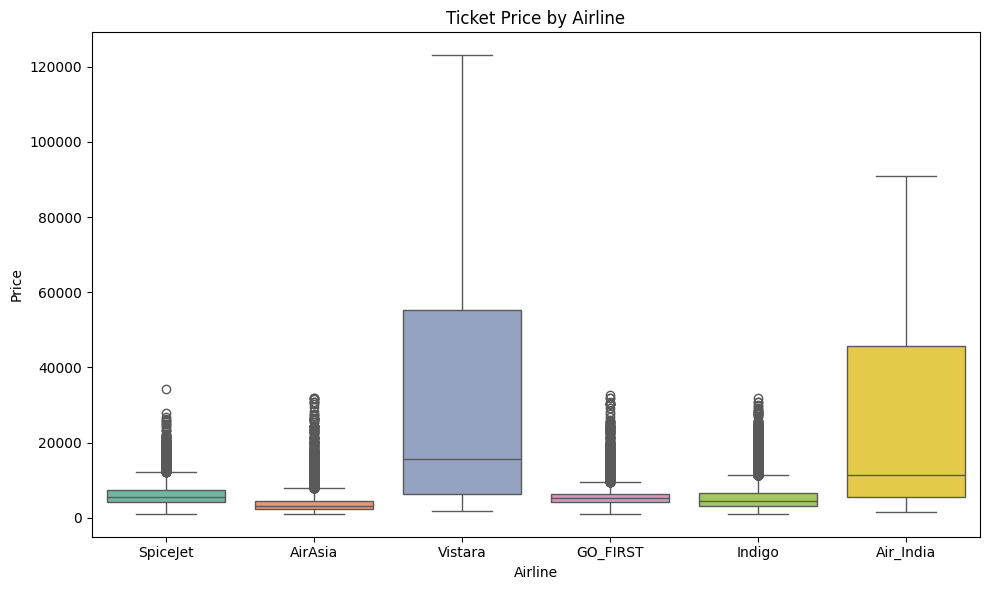

In [10]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(x=df['airline'], y=df['price'], palette='Set2')

plt.title('Ticket Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

### Which flight class is the most common?

In [11]:
unique_class = df.groupby(['flight', 'airline', 'class'], as_index=False).count()
unique_class = unique_class['class'].value_counts()
unique_class

class
Economy     1560
Business     295
Name: count, dtype: int64

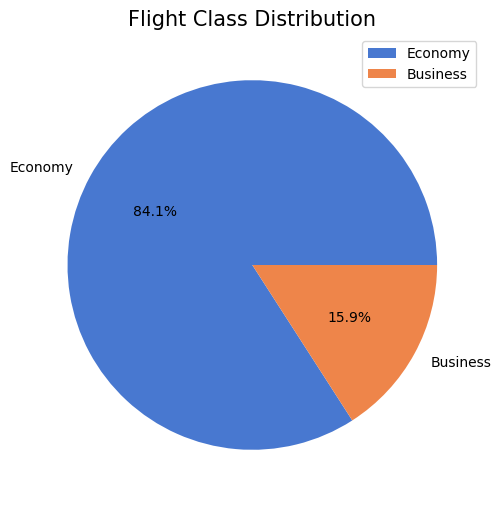

In [12]:
colors = sns.color_palette('muted')
plt.figure(figsize=(8,6))
ax=plt.pie(data=unique_class, x=unique_class.values, labels=unique_class.index, autopct='%.1f%%', colors=colors)
    
plt.title('Flight Class Distribution', fontsize=15)
plt.legend()
plt.show()

### Is there any price difference between flight classes?

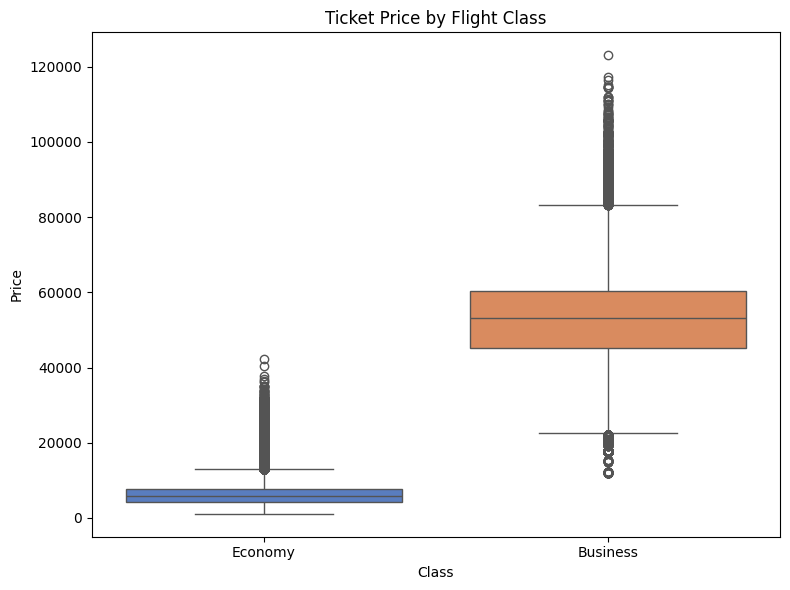

In [13]:
plt.figure(figsize=(8, 6))
ax=sns.boxplot(x=df['class'], y=df['price'], palette='muted')

plt.title('Ticket Price by Flight Class')
plt.xlabel('Class')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

### Are there any differences in ticket prices based on number of stops?

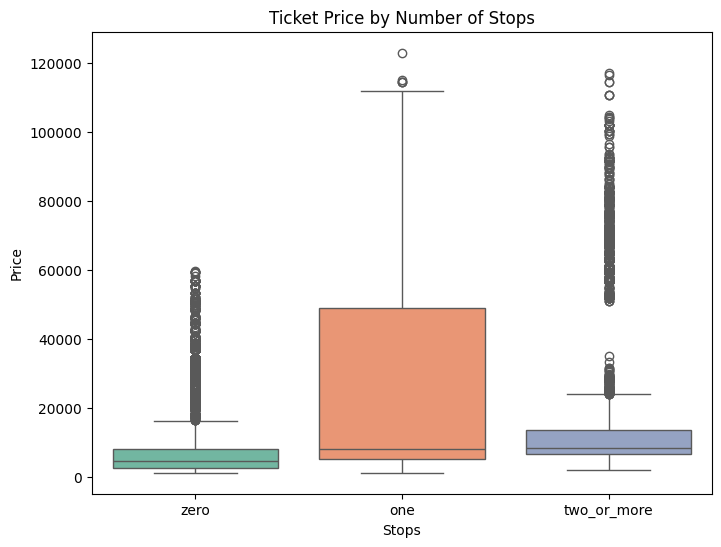

In [14]:
plt.figure(figsize=(8, 6))
ax=sns.boxplot(x=df['stops'], y=df['price'], palette='Set2',)

plt.title('Ticket Price by Number of Stops')
plt.xlabel('Stops')
plt.ylabel('Price')
plt.show()

### Are there any differences in ticket prices between departure cities and destination cities?

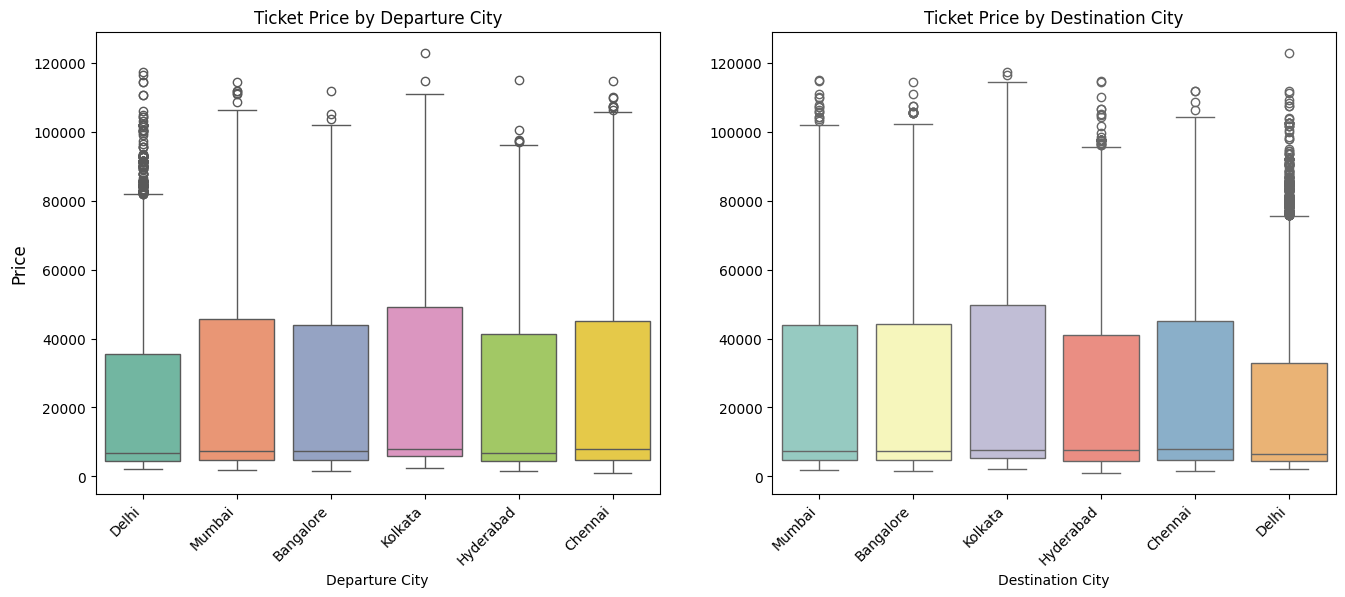

In [15]:
plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
ax=sns.boxplot(x=df['source_city'], y=df['price'], palette='Set2')
plt.title('Ticket Price by Departure City')
plt.xlabel('Departure City')
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.subplot(1,2,2)
ax=sns.boxplot(x=df['destination_city'], y=df['price'], palette='Set3')
plt.title('Ticket Price by Destination City')
plt.xlabel('Destination City')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')

plt.show()

### Are there any differences in ticket prices between departure time and arrival time?

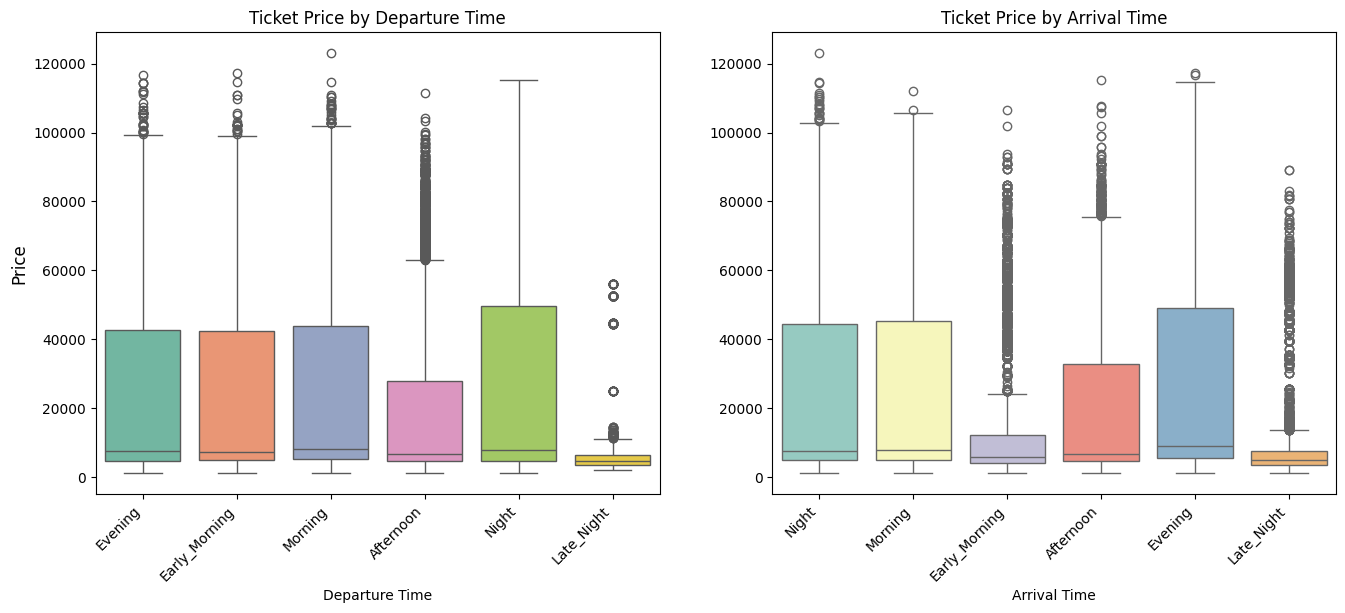

In [16]:
plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
ax=sns.boxplot(x=df['departure_time'], y=df['price'], palette='Set2')
plt.title('Ticket Price by Departure Time')
plt.xlabel('Departure Time')
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.subplot(1,2,2)
ax=sns.boxplot(x=df['arrival_time'], y=df['price'], palette='Set3')
plt.title('Ticket Price by Arrival Time')
plt.xlabel('Arrival Time')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')

plt.show()

### How does ticket price vary based on days left to departure?

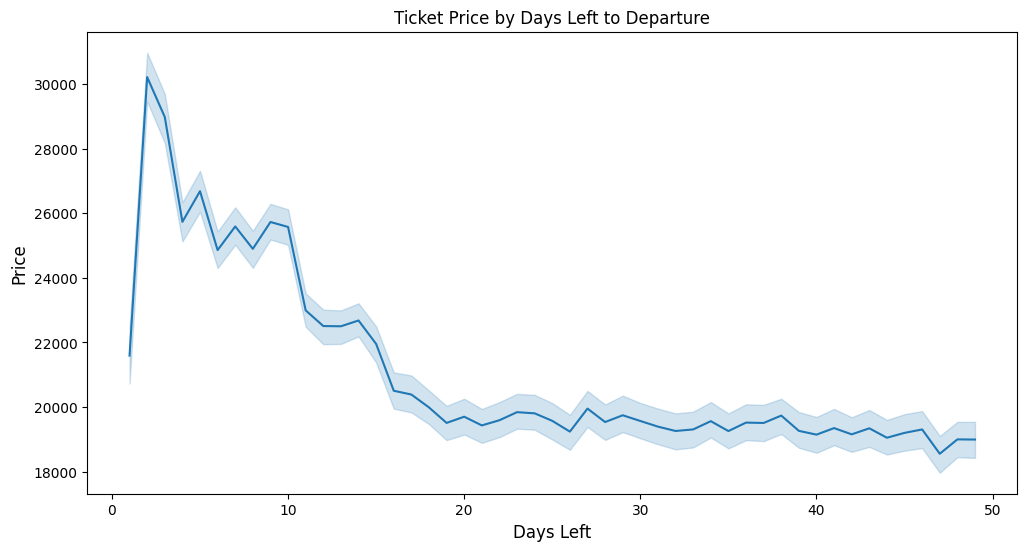

In [17]:
plt.figure(figsize=(12, 6))
ax=sns.lineplot(x=df['days_left'], y=df['price'])

plt.title('Ticket Price by Days Left to Departure')
plt.xlabel('Days Left', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.show()

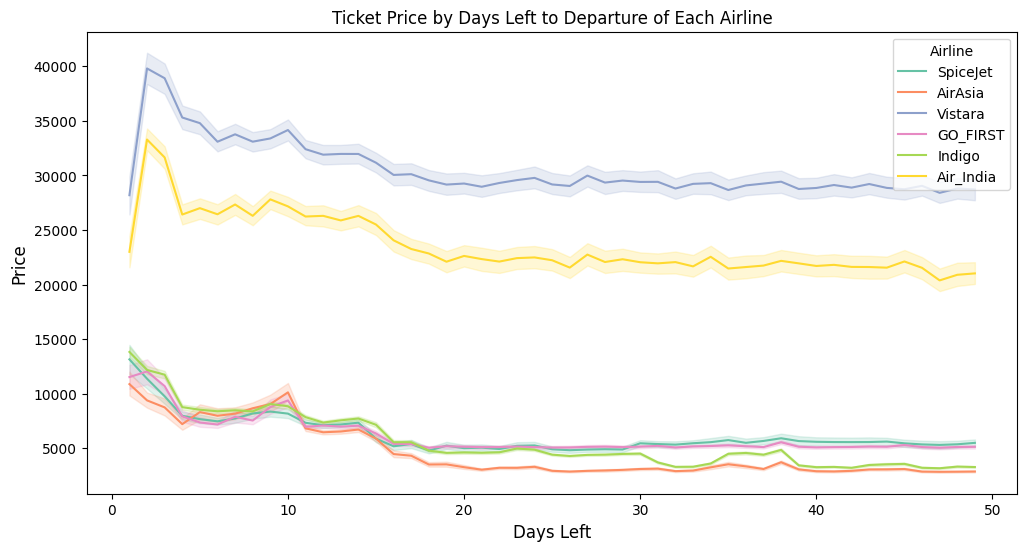

In [18]:
plt.figure(figsize=(12, 6))
ax=sns.lineplot(data=df, x='days_left', y='price', hue='airline', palette='Set2')

plt.title('Ticket Price by Days Left to Departure of Each Airline')
plt.xlabel('Days Left', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(title='Airline')

plt.show()

### How does ticket price vary based on flight duration?

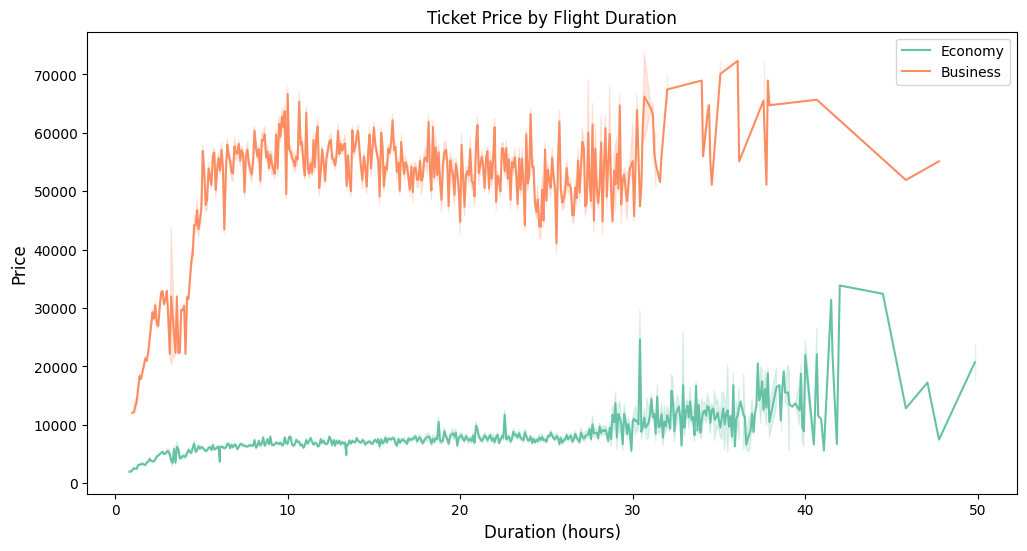

In [19]:
plt.figure(figsize=(12, 6))
ax=sns.lineplot(data=df, x='duration', y='price', hue='class', palette='Set2')

plt.legend()
plt.title('Ticket Price by Flight Duration')
plt.xlabel('Duration (hours)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()